# Линейная регрессия. Работа с признаками

## Описание задачи и загрузка данных

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

В этом задании мы рассмотрим различные аспекты построения линейной модели. Мы будем работать с одним из классических наборов данных в статистике, содержащим информацию о бриллиантах. Описание можно посмотреть [здесь](https://www.kaggle.com/shivam2503/diamonds).

In [43]:
data = pd.read_csv('https://raw.githubusercontent.com/evgpat/edu_stepik_practical_ml/main/datasets/diamonds.csv')
data.head(5)

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


Посмотрим на типы столбцов.

In [44]:
data.dtypes

Unnamed: 0      int64
carat         float64
cut            object
color          object
clarity        object
depth         float64
table         float64
price           int64
x             float64
y             float64
z             float64
dtype: object

Мы будем решать задачу предсказания цены бриллианта `price` в зависимости от его характеристик.

## Построение модели

### Задание 1

Есть ли в наборе данных пропущенные значения? Если да, удалите их. 

Также выведите на экран число пропусков в каждом столбце.

In [46]:
# your code here
data.isna().sum()

Unnamed: 0    0
carat         0
cut           0
color         0
clarity       0
depth         0
table         0
price         0
x             0
y             0
z             0
dtype: int64

### Задача 2

Есть ли в наборе данных бессмысленные столбцы (признаки, не несущие дополнительной информации)?  
Если да, то удалите их. 

In [51]:
# your code here
data = data.iloc[:,1:]

In [52]:
data.head(5)

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


### Задание 3

Линейная регрессия основана на предположении о линейной связи между признаками и целевой переменной, а потому перед выбором переменных для включения в модель имеет смысл проверить, насколько эта связь выполняется. Для следующих пунктов нам также потребуются корреляции между признаками.  
Выведите матрицу корреляций между всеми вещественными признаками и целевой переменной.

Какой вещественный признак коррелирует с целевой переменной больше всего?

In [53]:
import seaborn as sns

<AxesSubplot:>

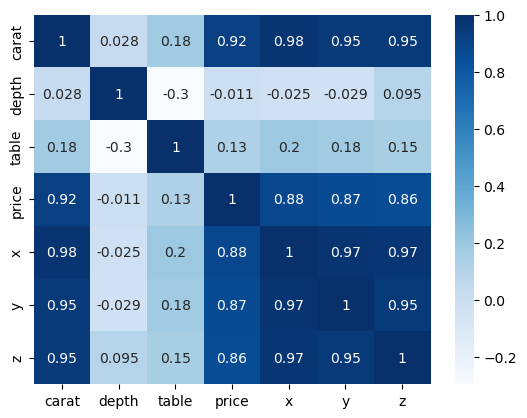

In [55]:
# your code here
corr = data.corr()
sns.heatmap(corr, cmap="Blues", annot=True)

### Задание 4

Так как линейная модель складывает значения признаков с некоторыми весами, нам нужно аккуратно обработать категориальные признаки. Закодируйте категориальные переменные при помощи OneHot-кодирования ([`pd.get_dummies`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.get_dummies.html)). Не забудьте поставить значение параметра `drop_first` равным `True`.

Сколько получилось столбцов в таблице `data`?

In [56]:
data.sample()

,carat,cut,color,clarity,depth,table,price,x,y,z
42799,0.5,Very Good,E,SI1,60.7,58.0,1351,5.09,5.13,3.1


In [57]:
# your code here
categorial = ['cut', 'color', 'clarity']

In [58]:
data2 = data.copy()

In [66]:
data = pd.get_dummies(data, columns = categorial, drop_first=True)

In [67]:
data.head(5)

,carat,depth,table,price,x,y,z,cut_Good,cut_Ideal,cut_Premium,...,color_H,color_I,color_J,clarity_IF,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2
0,0.23,61.5,55.0,326,3.95,3.98,2.43,0,1,0,...,0,0,0,0,0,1,0,0,0,0
1,0.21,59.8,61.0,326,3.89,3.84,2.31,0,0,1,...,0,0,0,0,1,0,0,0,0,0
2,0.23,56.9,65.0,327,4.05,4.07,2.31,1,0,0,...,0,0,0,0,0,0,1,0,0,0
3,0.29,62.4,58.0,334,4.20,4.23,2.63,0,0,1,...,0,1,0,0,0,0,0,1,0,0
4,0.31,63.3,58.0,335,4.34,4.35,2.75,1,0,0,...,0,0,1,0,0,1,0,0,0,0


### Задание 5

Создайте матрицу `X`, содержащую все признаки, и не содержащую целевую переменную `price`. Также создайте вектор `y`, содержащий целевую переменную `price`.

In [68]:
# your code here
price = data.price

In [69]:
X = data.drop('price', axis=1)

In [70]:
price.head()

0    326
1    326
2    327
3    334
4    335
Name: price, dtype: int64

In [71]:
X.head()

,carat,depth,table,x,y,z,cut_Good,cut_Ideal,cut_Premium,cut_Very Good,...,color_H,color_I,color_J,clarity_IF,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2
0,0.23,61.5,55.0,3.95,3.98,2.43,0,1,0,0,...,0,0,0,0,0,1,0,0,0,0
1,0.21,59.8,61.0,3.89,3.84,2.31,0,0,1,0,...,0,0,0,0,1,0,0,0,0,0
2,0.23,56.9,65.0,4.05,4.07,2.31,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0
3,0.29,62.4,58.0,4.20,4.23,2.63,0,0,1,0,...,0,1,0,0,0,0,0,1,0,0
4,0.31,63.3,58.0,4.34,4.35,2.75,1,0,0,0,...,0,0,1,0,0,1,0,0,0,0


Разделите выборку на тренировочную и тестовую. Долю тестовой выборки укажите равной `0.3`.

При разбиении укажите `random_state = 42`.

In [72]:
RANDOM_STATE = 42

In [82]:
price.head()

0    326
1    326
2    327
3    334
4    335
Name: price, dtype: int64

In [73]:
from sklearn.model_selection import train_test_split

Xtrain, Xtest, ytrain, ytest = train_test_split(X, price, test_size=0.3, random_state=42)

,carat,depth,table,x,y,z,cut_Good,cut_Ideal,cut_Premium,cut_Very Good,...,color_H,color_I,color_J,clarity_IF,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2
19497,1.21,61.3,57.0,6.92,6.87,4.23,0,1,0,0,...,1,0,0,0,0,0,0,0,0,1
31229,0.31,62.0,56.0,4.38,4.36,2.71,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
22311,1.21,62.4,57.0,6.75,6.83,4.24,0,1,0,0,...,0,0,0,0,0,0,1,0,0,0
278,0.81,62.6,55.0,5.92,5.96,3.72,0,1,0,0,...,0,0,0,0,0,1,0,0,0,0
6646,0.79,61.7,56.0,5.94,5.95,3.67,0,1,0,0,...,0,1,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11284,1.05,62.4,59.0,6.48,6.51,4.05,0,0,0,1,...,0,1,0,0,0,0,0,1,0,0
44732,0.47,61.0,55.0,5.03,5.01,3.06,0,1,0,0,...,0,0,0,0,0,0,1,0,0,0
38158,0.33,60.3,58.0,4.49,4.46,2.70,0,0,0,1,...,0,0,0,1,0,0,0,0,0,0
860,0.90,62.8,59.0,6.13,6.03,3.82,0,0,1,0,...,0,0,1,0,1,0,0,0,0,0


### Задание 6

Зачастую при использовании линейных моделей вещественные признаки масштабируются.  В этой задаче масштабируйте вещественные признаки тренировочной и тестовой выборок при помощи модуля `StandardScaler`.

*  Обучите (`fit`) scaler на тренировочных данных
*  Преобразуйте (`transform`) и трейн, и тест

После применения масштабирования матрица перестает быть объектом `pandas.DataFrame` - решите эту проблему.

In [83]:
from sklearn.preprocessing import StandardScaler

# your code here

In [85]:
preprocess = StandardScaler()
preprocess.fit(Xtrain)

StandardScaler()

In [100]:
Xtrain_trans = pd.DataFrame(preprocess.transform(Xtrain), columns=Xtrain.columns)

In [101]:
Xtrain_trans.head()

,carat,depth,table,x,y,z,cut_Good,cut_Ideal,cut_Premium,cut_Very Good,...,color_H,color_I,color_J,clarity_IF,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2
0,0.862659,-0.311437,-0.207099,1.055581,0.986556,0.968253,-0.314881,1.227398,-0.585893,-0.539653,...,2.329335,-0.333294,-0.234494,-0.184885,-0.568277,-0.451216,-0.422668,-0.542475,-0.270252,3.121212
1,-1.029889,0.178549,-0.656213,-1.207734,-1.202544,-1.168276,-0.314881,1.227398,-0.585893,-0.539653,...,-0.429307,-0.333294,-0.234494,-0.184885,-0.568277,-0.451216,-0.422668,1.843403,-0.270252,-0.320388
2,0.862659,0.458541,-0.207099,0.904099,0.951670,0.982309,-0.314881,1.227398,-0.585893,-0.539653,...,-0.429307,-0.333294,-0.234494,-0.184885,-0.568277,-0.451216,2.365922,-0.542475,-0.270252,-0.320388
3,0.021527,0.598537,-1.105327,0.164512,0.192898,0.251391,-0.314881,1.227398,-0.585893,-0.539653,...,-0.429307,-0.333294,-0.234494,-0.184885,-0.568277,2.216235,-0.422668,-0.542475,-0.270252,-0.320388
4,-0.020530,-0.031445,-0.656213,0.182333,0.184176,0.181110,-0.314881,1.227398,-0.585893,-0.539653,...,-0.429307,3.000353,-0.234494,-0.184885,-0.568277,-0.451216,-0.422668,-0.542475,-0.270252,3.121212


### Задание 7

Обучите линейную регрессию на тренировочной выборке. Выведите *r2-score* на тренировочной и тестовой выборках.

In [93]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

# your code here

In [94]:
model = LinearRegression()
model.fit(Xtrain_trans, ytrain)

LinearRegression()

In [102]:
preprocess.fit(Xtest)
Xtest_trans = preprocess.transform(Xtest)
Xtest_trans = pd.DataFrame(Xtest_trans, columns=Xtest.columns)

In [103]:
Xtest_trans.head(5)

,carat,depth,table,x,y,z,cut_Good,cut_Ideal,cut_Premium,cut_Very Good,...,color_H,color_I,color_J,clarity_IF,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2
0,-1.177152,0.235906,-0.642780,-1.562934,-1.523982,-1.536090,-0.319634,1.222509,-0.586532,-0.531655,...,-0.420155,-0.33662,-0.233991,-0.186158,-0.558555,-0.458115,-0.422189,-0.541875,3.730186,-0.325588
1,-0.454302,-1.220570,-0.198865,-0.251053,-0.269090,-0.394598,-0.319634,-0.817990,-0.586532,1.880919,...,-0.420155,-0.33662,-0.233991,-0.186158,-0.558555,-0.458115,-0.422189,-0.541875,-0.268083,3.071363
2,-0.836987,0.235906,-1.086695,-0.857909,-0.870024,-0.842525,-0.319634,1.222509,-0.586532,-0.531655,...,-0.420155,-0.33662,-0.233991,-0.186158,-0.558555,-0.458115,-0.422189,-0.541875,-0.268083,3.071363
3,-0.773206,-0.665722,-0.198865,-0.715120,-0.737465,-0.799177,-0.319634,-0.817990,1.704936,-0.531655,...,-0.420155,-0.33662,-0.233991,-0.186158,-0.558555,-0.458115,-0.422189,-0.541875,-0.268083,3.071363
4,1.607947,0.374617,-1.086695,1.533821,1.454177,1.556054,-0.319634,1.222509,-0.586532,-0.531655,...,-0.420155,-0.33662,-0.233991,-0.186158,-0.558555,2.182859,-0.422189,-0.541875,-0.268083,-0.325588


In [104]:
price_pred = model.predict(Xtest_trans)

c:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(


In [105]:
price_pred

array([  745.04548691,  3167.22885937,  1888.48581311, ...,
       10760.08851766,  4078.01056611,  2037.08451817])

In [110]:
np.array(ytest)

array([  559,  2201,  1238, ..., 13157,  2960,  1323], dtype=int64)

In [111]:
r2_score(np.array(ytest), price_pred)

0.9197140373867393

### Задание 8

Выведите на экран веса, которые линейная регрессия присвоила признакам. 

Какой признак имеет наибольший отрицательный вес? (наибольший по модулю среди всех отрицательных весов)

In [112]:
# your code here
model.coef_

array([ 5338.61567061,   -90.17381703,   -60.33227991, -1100.41885004,
          -6.45891672,   -34.25894462,   170.60293265,   414.36951486,
         339.23920411,   310.65425625,   -83.64002086,  -104.56099268,
        -202.86356354,  -362.00229958,  -442.78356742,  -529.44921589,
         975.93364117,  1611.5716809 ,  1042.92121499,  1670.31849636,
        1817.66420828,  1284.80947523,  1461.03419387])

In [113]:
results = pd.DataFrame({'name': X.columns, 'coef': model.coef_})

In [122]:
results.sort_values('coef')

,name,coef
3,x,-1100.418850
15,color_J,-529.449216
14,color_I,-442.783567
13,color_H,-362.002300
12,color_G,-202.863564
11,color_F,-104.560993
1,depth,-90.173817
10,color_E,-83.640021
2,table,-60.332280
5,z,-34.258945


## Попытка улучшить качество модели

Данная часть является творческой, и задания в ней немного сложнее, чем предыдущие. 

Следующие вопросы не проверяются тестами.

### Задание 9

Как можно заметить из анализа корреляционной матрицы в задании 3, между некоторыми признаками имеется сильная корреляция, что может быть индикатором проблемы *мультиколлинеарности*. Различия в порядке коэффициентов, выявленные в предыдущей задаче, также свидетельствуют об этом. Для решения этой проблемы можно либо исключить некоторые признаки из модели (например, если признак линейно зависим с какими-то другими, его можно исключить из модели, т.е. удалить из матрицы объект-признак и заново обучить модель).

Удалите из матриц `Xtrain` и `Xtest` признак, который наиболее сильно коррелирует с остальными. Заново обучите модель и оцените её качество. Улучшилось ли качество модели?

Попробуйте удалить какой-то другой признак (можете попробовать несколько вариантов). Помогло ли это улучшить качество модели?

In [127]:
Xtrain.sample()

,carat,depth,table,x,y,z,cut_Good,cut_Ideal,cut_Premium,cut_Very Good,...,color_H,color_I,color_J,clarity_IF,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2
22786,1.7,62.9,60.0,7.56,7.61,4.77,0,0,0,1,...,0,0,1,0,0,0,0,0,1,0


In [173]:
Xtrain2 = Xtrain.drop('z', axis=1)
Xtest2 = Xtest.drop('z', axis=1)

In [169]:
Xtrain2.sample()

,carat,depth,table,y,z,cut_Good,cut_Ideal,cut_Premium,cut_Very Good,color_E,...,color_H,color_I,color_J,clarity_IF,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2
4904,0.91,61.8,53.0,6.3,3.87,0,1,0,0,1,...,0,0,0,0,0,1,0,0,0,0


In [174]:
Xtrain2_std = preprocess.fit_transform(Xtrain2)
Xtest2_std = preprocess.fit_transform(Xtest2)

In [175]:
Xtrain2_std = pd.DataFrame(Xtrain2_std, columns=Xtrain2.columns)
Xtest2_std = pd.DataFrame(Xtest2_std, columns=Xtest2.columns)

In [149]:
Xtest2_std.sample()

,depth,table,x,y,z,cut_Good,cut_Ideal,cut_Premium,cut_Very Good,color_E,...,color_H,color_I,color_J,clarity_IF,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2
12029,-0.665722,0.24505,-0.420615,-0.375137,-0.466844,-0.319634,-0.81799,-0.586532,1.880919,-0.471778,...,-0.420155,-0.33662,-0.233991,-0.186158,-0.558555,-0.458115,-0.422189,-0.541875,3.730186,-0.325588


In [150]:
model2 = LinearRegression()

In [176]:
model2.fit(Xtrain2_std, ytrain)

LinearRegression()

In [177]:
price_pred2 = model2.predict(Xtest2_std)

In [142]:
price_pred2

array([  607.23227654,  3269.13754024,  1927.16976975, ...,
       10738.24295171,  4118.0534877 ,  2064.52530426])

In [143]:
np.array(ytest)

array([  559,  2201,  1238, ..., 13157,  2960,  1323], dtype=int64)

In [ ]:
#0.9197140373867393

In [178]:
r2_score(np.array(ytest), price_pred2)

0.9197074977508

### Задание 10

Иногда генерация новых признаков помогает модели лучше находить взаимосвязи между целевой переменной и признаками. Попробуйте придумать новые признаки и добавить их в модель.  

Помогло ли это улучшить качество модели?

In [ ]:
# your code here